In [ ]:
import sys; sys.path.append("..")

from utils.model_evaluation import model_selection

In [22]:
_, scores_knn = model_selection(P_FOLDER, "spec_test", kw="specknn_1", up_to_k=30, \
                                      l=4, j=6, to_rel_inten=.5, l_rel=None)

specknn_1
Possible k up to 30, predict up to 20 peaks
Selected up to k=30, l=4, j=6
Selected up to k=30, l=None, to_rel_inten=0.5
[14527 18346 20337 21393 21955 22225 22321 22406 22453 22421 22429 22381
 22340 22303 22224 22141 22081 21974 21874 21744 21609 21471 21333 21168
 21006 20808 20607 20399 20226 20014]


# DOWN TO 0.4

In [49]:
_, scores_gpt_detail = model_selection(P_FOLDER, "hugg_test", kw="gpt", up_to_k=20, \
                                      l=4, j=6, to_rel_inten=.4, l_rel=None, return_details=True)

gpt2_ns_auto
Possible k up to 30, predict up to 20 peaks
Selected up to k=20, l=4, j=6
Selected up to k=20, l=None, to_rel_inten=0.4
21
21
23
21
21
36
27
21
21
22
22
23
23
22
28
21
22
23
21
21
22
40
22
25
25
21
22
23
21
21
36
23
28
24
25
30
25
23
25
21
23
22
23
22
22
28
24
26
23
21
24
33
23
21
24
29
27
24
25
21
25
21
23
23
21
21
27
26
27
25
22
29
21
39
22
27
24
21
24
21
24
22
22
22
22
21
22
25
21
30
21
23
28
36
27
27
27
21
22
38949
[16975 20251 21556 22133 22368 22479 22507 22522 22538 22499 22478 22433
 22383 22345 22248 22186 22105 21999 21894 21768]


In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
TP, FP, FN = scores_gpt_detail["gpt2_ns_auto"]["dets"]
precisions = scores_gpt_detail["gpt2_ns_auto"]["precs"]

TP = TP[~np.isnan(precisions)]
FP = FP[~np.isnan(precisions)]
FN = FN[~np.isnan(precisions)]
precisions = precisions[~np.isnan(precisions)]

In [52]:
def get_xs(TP, FP, precisions):
    xs = [list() for _ in range(20)]
    for i, p in enumerate(precisions):
        xs[int(TP[i]+FP[i])-1].append(p)
    for x in xs:
        x.pop(0)
    return xs
xs = get_xs(TP, FP, precisions)

Text(0.5, 1.0, 'down_to_.4')

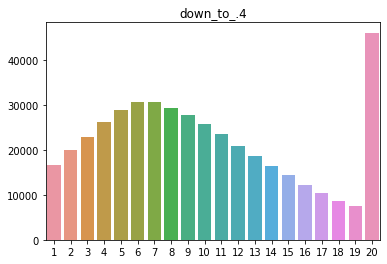

In [55]:
sns.barplot(y=[*map(len, xs)], x=np.arange(1,21))
plt.title("down_to_.4")

<AxesSubplot:>

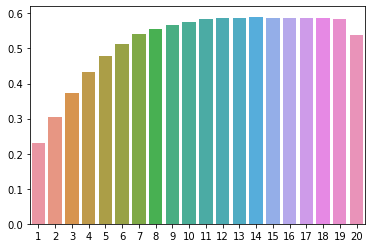

In [56]:
sns.barplot(y=[*map(lambda x: sum(x)/len(x), xs)], x=np.arange(1,21))

In [108]:
#per k 

In [109]:
<

0.4
k=0, over 19 peaks were in the region of interest in 25 out of 16955 cases 


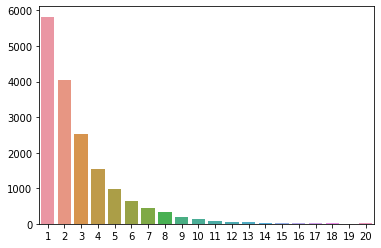

k=1, over 19 peaks were in the region of interest in 74 out of 20231 cases 


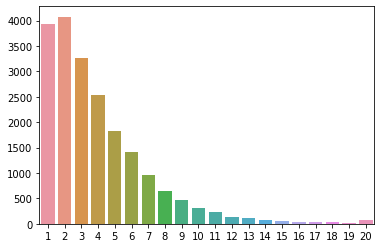

k=2, over 19 peaks were in the region of interest in 175 out of 21536 cases 


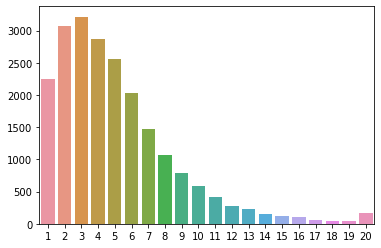

k=3, over 19 peaks were in the region of interest in 300 out of 22113 cases 


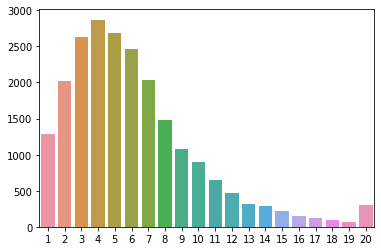

k=4, over 19 peaks were in the region of interest in 479 out of 22348 cases 


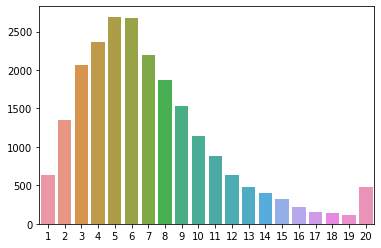

k=5, over 19 peaks were in the region of interest in 706 out of 22459 cases 


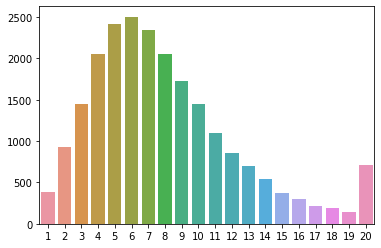

k=6, over 19 peaks were in the region of interest in 939 out of 22487 cases 


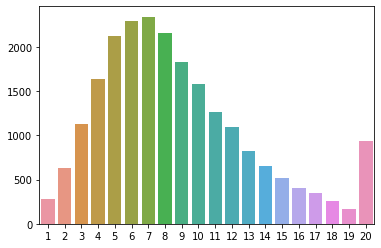

k=7, over 19 peaks were in the region of interest in 1232 out of 22502 cases 


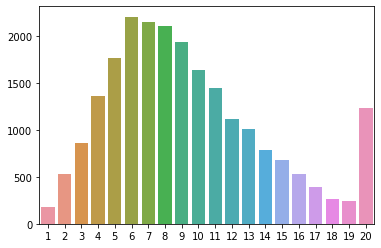

k=8, over 19 peaks were in the region of interest in 1543 out of 22518 cases 


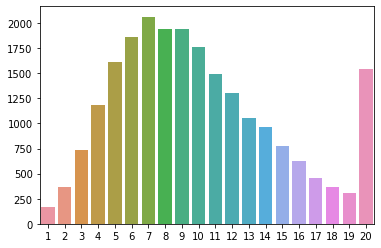

k=9, over 19 peaks were in the region of interest in 1874 out of 22479 cases 


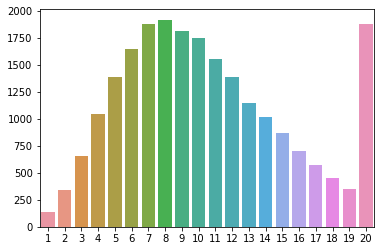

k=10, over 19 peaks were in the region of interest in 2243 out of 22458 cases 


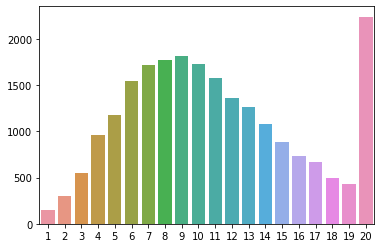

k=11, over 19 peaks were in the region of interest in 2644 out of 22413 cases 


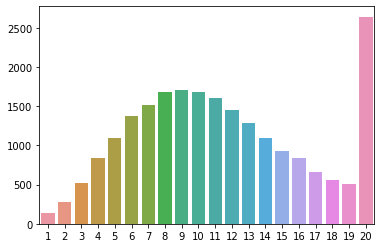

k=12, over 19 peaks were in the region of interest in 3019 out of 22363 cases 


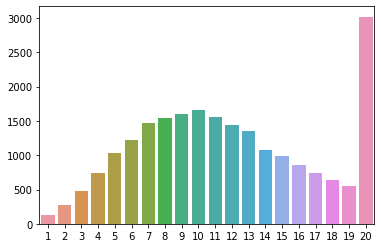

k=13, over 19 peaks were in the region of interest in 3372 out of 22325 cases 


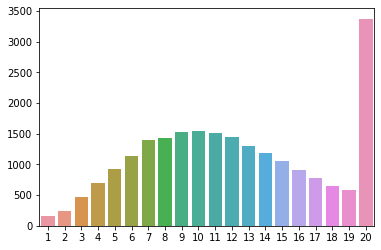

k=14, over 19 peaks were in the region of interest in 3756 out of 22228 cases 


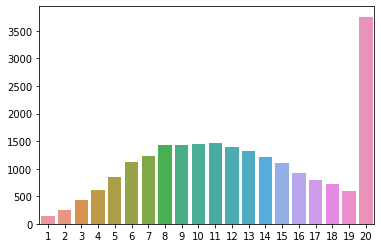

k=15, over 19 peaks were in the region of interest in 4118 out of 22166 cases 


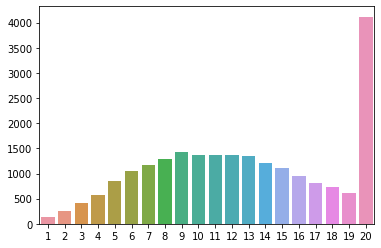

k=16, over 19 peaks were in the region of interest in 4455 out of 22085 cases 


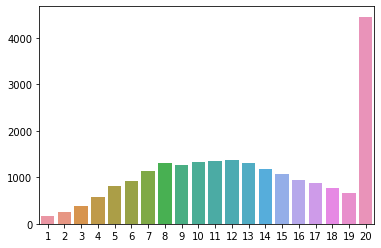

k=17, over 19 peaks were in the region of interest in 4721 out of 21979 cases 


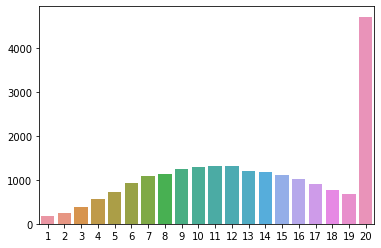

k=18, over 19 peaks were in the region of interest in 5045 out of 21874 cases 


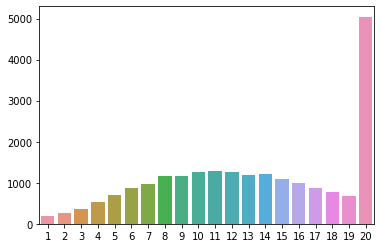

k=19, over 19 peaks were in the region of interest in 5347 out of 21748 cases 


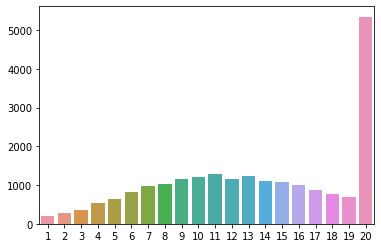

In [61]:
TP, FP, FN = scores_gpt_detail["gpt2_ns_auto"]["dets"]
precisions = scores_gpt_detail["gpt2_ns_auto"]["precs"]
k_lens= [] 
print(0.4)
for k in range(len(precisions)):
    TP_ = TP[k][~np.isnan(precisions[k])]
    FP_ = FP[k][~np.isnan(precisions[k])]
    precisions_ = precisions[k][~np.isnan(precisions[k])]
    xs = get_xs(TP_, FP_, precisions_)
    lens= [*map(len, xs)]
    sns.barplot(y=lens, x=np.arange(1,21))
    print(f"k={k}, over 19 peaks were in the region of interest in {lens[-1]} out of {sum(lens)} cases ")
    plt.show()
    k_lens.append(lens)

In [123]:
Z = np.array(k_lens)

In [126]:
X, Y = np.meshgrid(np.arange(1,21), np.arange(30))

Text(0, 0.5, 'y')

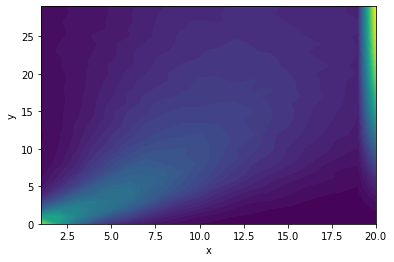

In [133]:
fig = plt.figure()
ax = plt.axes()#plt.axes(projection='3d')
ax.contourf(X, Y, Z, 50) #cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.set_zlabel('z');

0


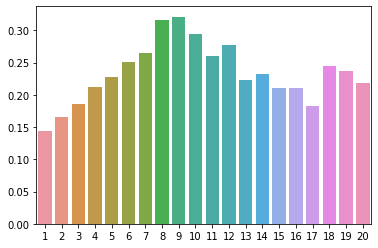

1


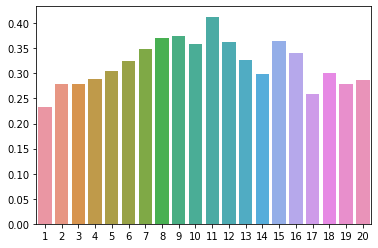

2


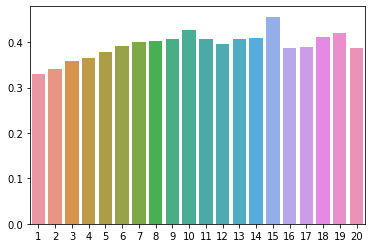

3


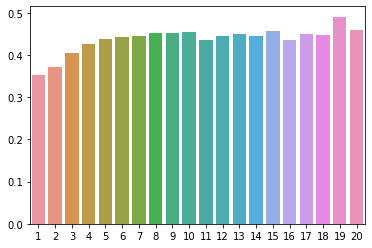

4


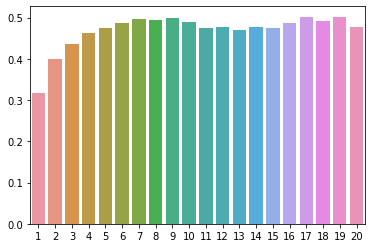

5


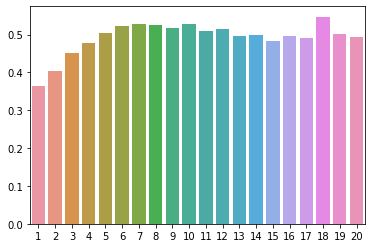

6


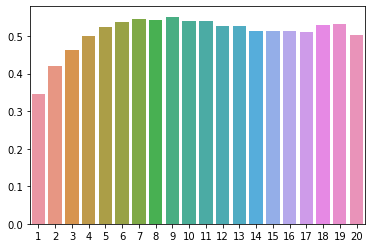

7


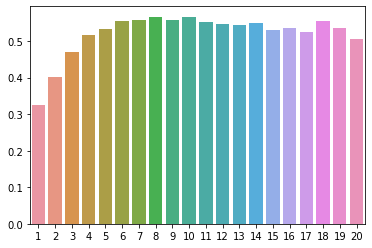

8


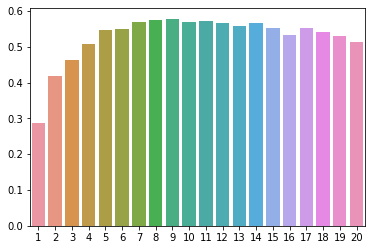

9


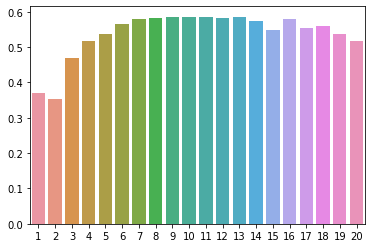

10


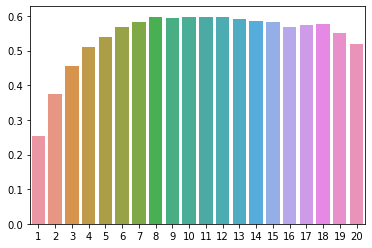

11


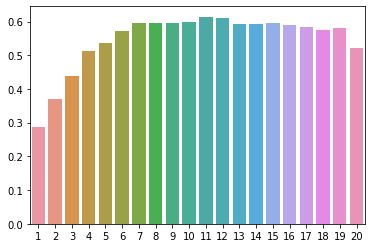

12


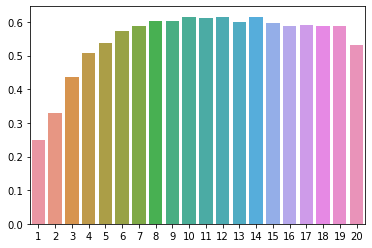

13


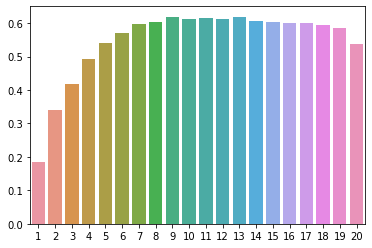

14


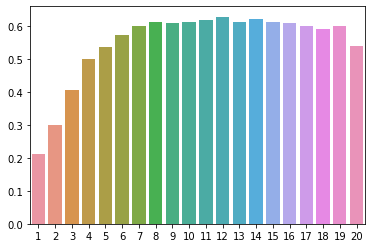

15


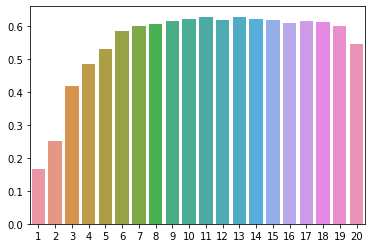

16


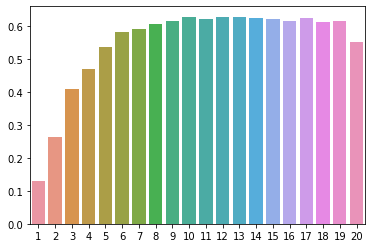

17


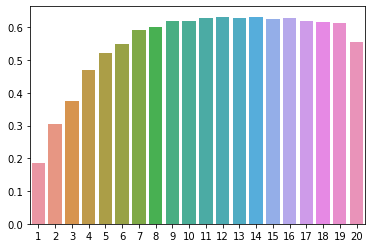

18


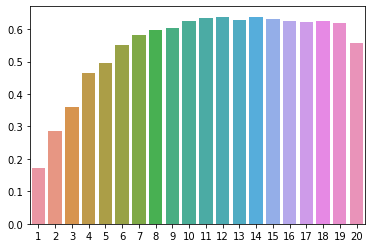

19


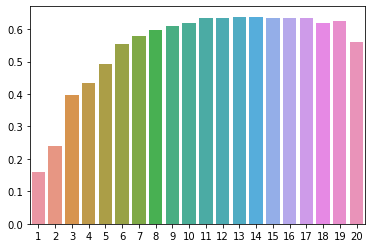

20


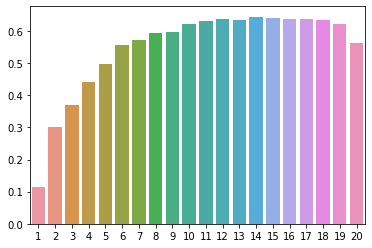

21


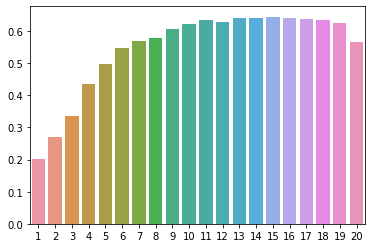

22


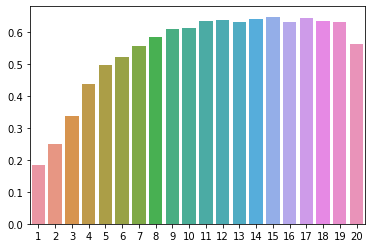

23


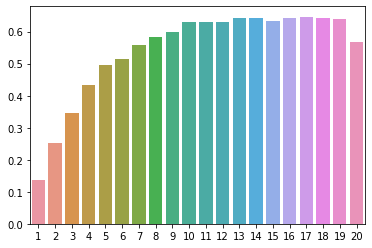

24


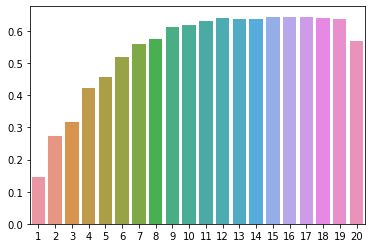

25


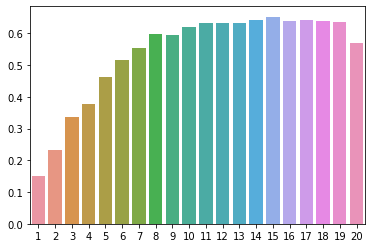

26


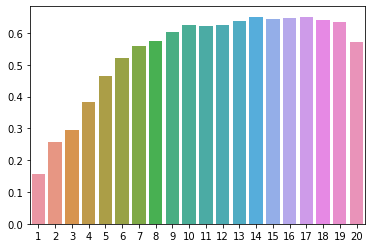

27


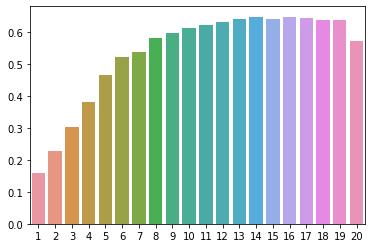

28


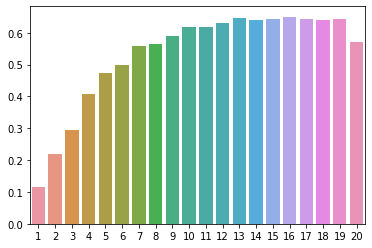

29


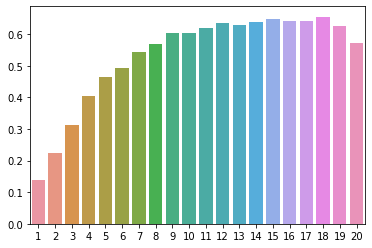

In [138]:
k_precs= [] 
for k in range(len(precisions)):
    TP_ = TP[k][~np.isnan(precisions[k])]
    FP_ = FP[k][~np.isnan(precisions[k])]
    precisions_ = precisions[k][~np.isnan(precisions[k])]
    xs = get_xs(TP_, FP_, precisions_)
    precs= [*map(lambda x: sum(x)/len(x), xs)]
    sns.barplot(y=precs, x=np.arange(1,21))
    print(k)
    plt.show()
    k_precs.append(precs)

In [139]:
Z = np.array(k_precs)

In [140]:
X, Y = np.meshgrid(np.arange(1,21), np.arange(30))

<ipython-input-147-bf9bb5b99011>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(plt.axes(projection='3d'))


Text(0.5, 0, 'k')

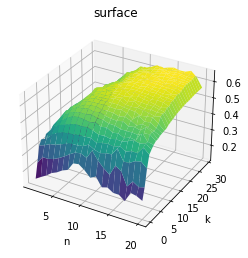

In [147]:
fig = plt.figure()
ax = plt.axes(plt.axes(projection='3d'))
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');
ax.set_xlabel('n')
ax.set_ylabel('k')
#ax.set_zlabel('z');

In [43]:
TP, FP, FN = scores_knn_detail["gpt2_ns_auto"]["dets"]
precisions = scores_knn_detail["gpt2_ns_auto"]["precs"]

NameError: name 'scores_knn_detail' is not defined

# DOWN TO 0.2

In [62]:
_, scores_gpt_detail = model_selection(P_FOLDER, "hugg_test", kw="gpt", up_to_k=20, \
                                      l=4, j=6, to_rel_inten=.2, l_rel=None, return_details=True)

gpt2_ns_auto
Possible k up to 30, predict up to 20 peaks
Selected up to k=20, l=4, j=6
Selected up to k=20, l=None, to_rel_inten=0.2
30
21
24
24
22
22
25
21
24
26
27
29
25
21
27
31
27
21
27
21
21
25
25
21
31
24
21
22
26
21
28
21
21
22
29
24
24
21
21
21
24
33
23
21
27
21
23
24
22
24
28
21
21
23
25
26
25
27
21
23
22
21
26
30
21
30
26
22
21
22
30
24
23
23
31
29
27
22
26
24
28
21
22
21
21
24
25
21
24
28
29
28
23
30
21
21
31
23
23
174499
[21122 22328 22520 22555 22561 22559 22562 22562 22563 22530 22501 22451
 22407 22354 22277 22205 22122 22016 21919 21799]


In [63]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
TP, FP, FN = scores_gpt_detail["gpt2_ns_auto"]["dets"]
precisions = scores_gpt_detail["gpt2_ns_auto"]["precs"]

TP = TP[~np.isnan(precisions)]
FP = FP[~np.isnan(precisions)]
FN = FN[~np.isnan(precisions)]
precisions = precisions[~np.isnan(precisions)]

In [65]:
def get_xs(TP, FP, precisions):
    xs = [list() for _ in range(20)]
    for i, p in enumerate(precisions):
        xs[int(TP[i]+FP[i])-1].append(p)
    for x in xs:
        x.pop(0)
    return xs
xs = get_xs(TP, FP, precisions)

Text(0.5, 1.0, 'down_to_.2')

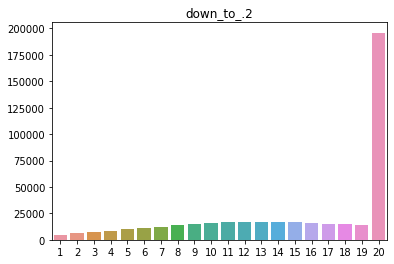

In [66]:
sns.barplot(y=[*map(len, xs)], x=np.arange(1,21))
plt.title("down_to_.2")

<AxesSubplot:>

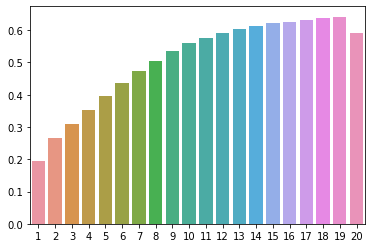

In [67]:
sns.barplot(y=[*map(lambda x: sum(x)/len(x), xs)], x=np.arange(1,21))

In [108]:
#per k 

In [109]:
<

0.2
k=0, over 19 peaks were in the region of interest in 626 out of 21102 cases 


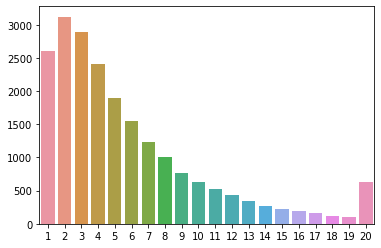

k=1, over 19 peaks were in the region of interest in 1420 out of 22308 cases 


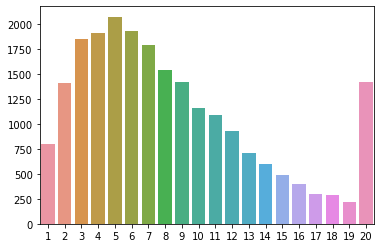

k=2, over 19 peaks were in the region of interest in 2582 out of 22500 cases 


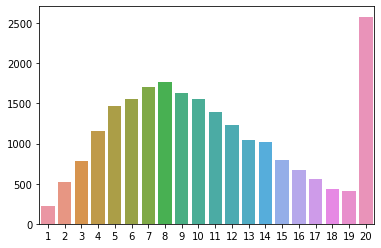

k=3, over 19 peaks were in the region of interest in 4037 out of 22535 cases 


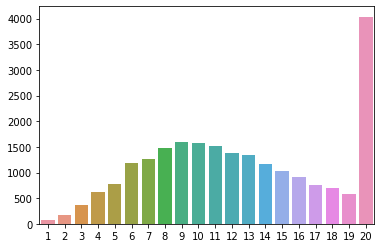

k=4, over 19 peaks were in the region of interest in 5599 out of 22541 cases 


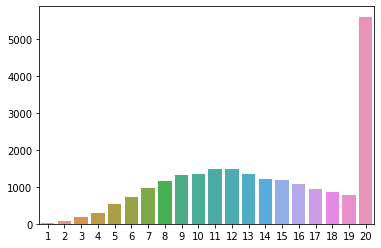

k=5, over 19 peaks were in the region of interest in 7116 out of 22539 cases 


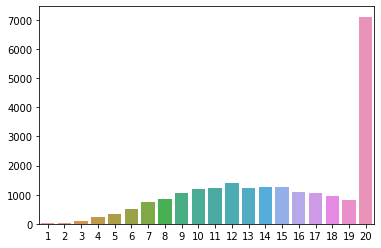

k=6, over 19 peaks were in the region of interest in 8470 out of 22542 cases 


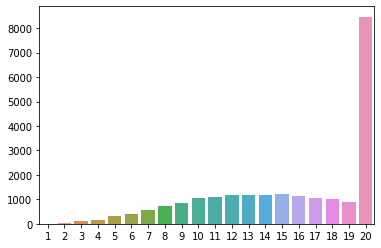

k=7, over 19 peaks were in the region of interest in 9658 out of 22542 cases 


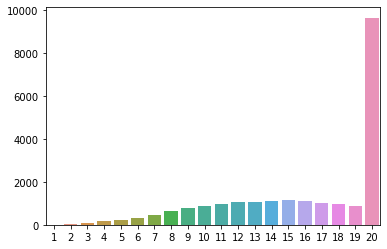

k=8, over 19 peaks were in the region of interest in 10624 out of 22543 cases 


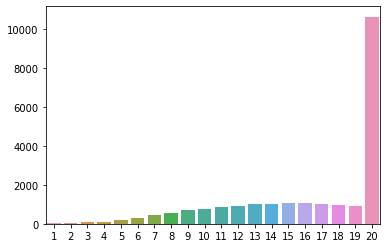

k=9, over 19 peaks were in the region of interest in 11419 out of 22510 cases 


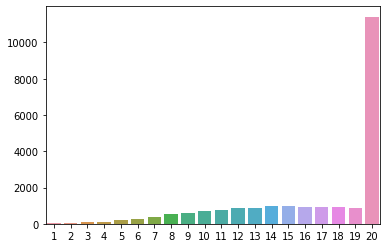

k=10, over 19 peaks were in the region of interest in 12056 out of 22481 cases 


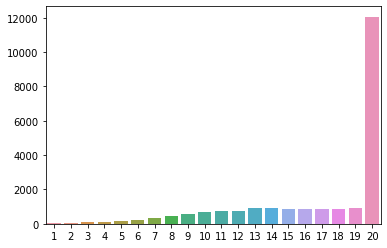

k=11, over 19 peaks were in the region of interest in 12536 out of 22431 cases 


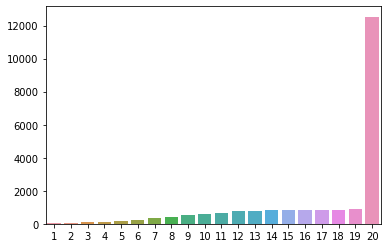

k=12, over 19 peaks were in the region of interest in 12997 out of 22387 cases 


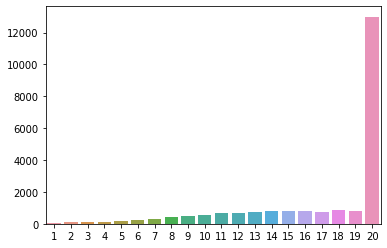

k=13, over 19 peaks were in the region of interest in 13308 out of 22334 cases 


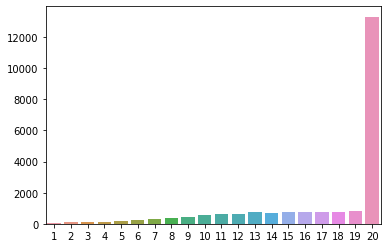

k=14, over 19 peaks were in the region of interest in 13554 out of 22257 cases 


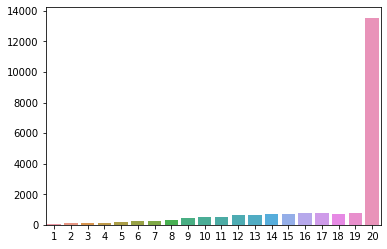

k=15, over 19 peaks were in the region of interest in 13751 out of 22185 cases 


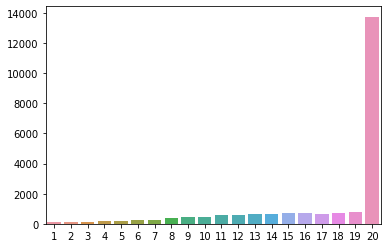

k=16, over 19 peaks were in the region of interest in 13920 out of 22102 cases 


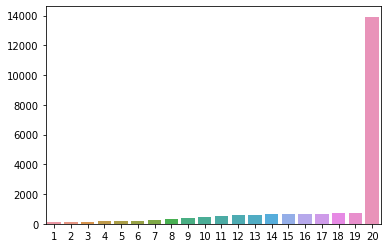

k=17, over 19 peaks were in the region of interest in 14029 out of 21996 cases 


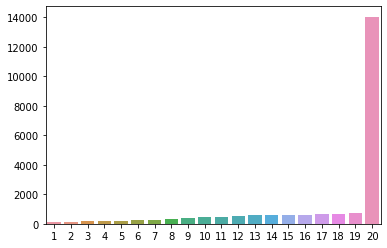

k=18, over 19 peaks were in the region of interest in 14088 out of 21899 cases 


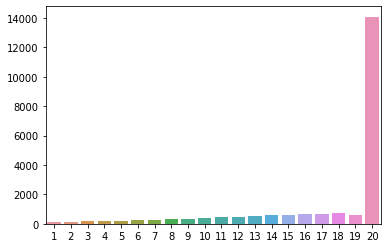

k=19, over 19 peaks were in the region of interest in 14170 out of 21779 cases 


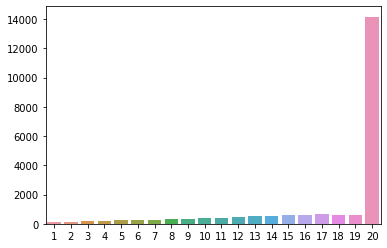

In [68]:
TP, FP, FN = scores_gpt_detail["gpt2_ns_auto"]["dets"]
precisions = scores_gpt_detail["gpt2_ns_auto"]["precs"]
k_lens= [] 
print(0.2)
for k in range(len(precisions)):
    TP_ = TP[k][~np.isnan(precisions[k])]
    FP_ = FP[k][~np.isnan(precisions[k])]
    precisions_ = precisions[k][~np.isnan(precisions[k])]
    xs = get_xs(TP_, FP_, precisions_)
    lens= [*map(len, xs)]
    sns.barplot(y=lens, x=np.arange(1,21))
    print(f"k={k}, over 19 peaks were in the region of interest in {lens[-1]} out of {sum(lens)} cases ")
    plt.show()
    k_lens.append(lens)

In [72]:
Z = np.array(k_lens)

In [73]:
X, Y = np.meshgrid(np.arange(1,21), np.arange(20))

Text(0, 0.5, 'y')

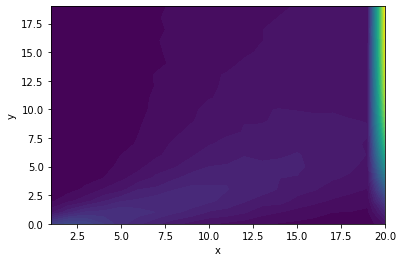

In [74]:
fig = plt.figure()
ax = plt.axes()#plt.axes(projection='3d')
ax.contourf(X, Y, Z, 50) #cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.set_zlabel('z');

0


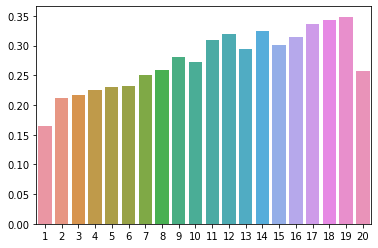

1


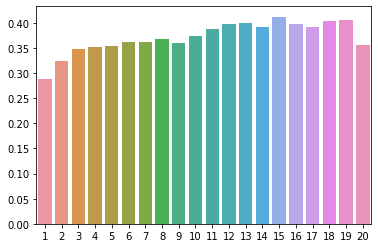

2


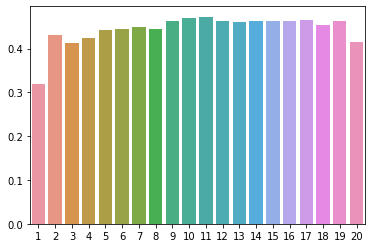

3


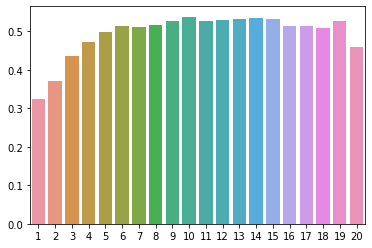

4


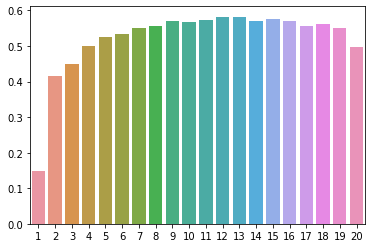

5


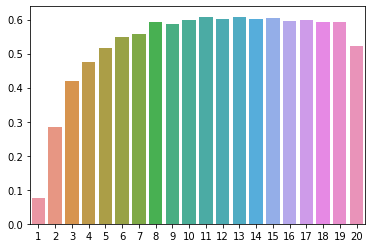

6


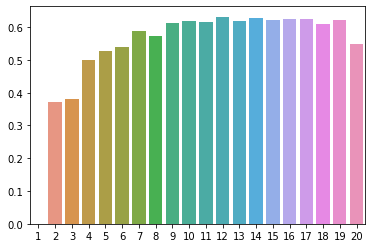

7


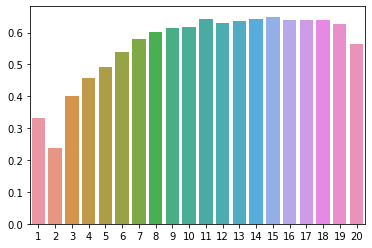

8


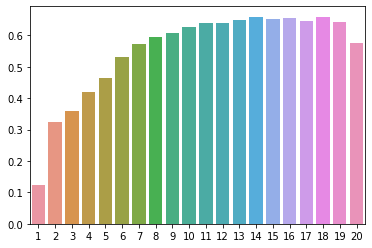

9


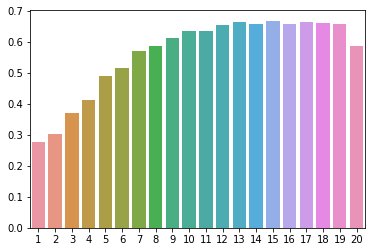

10


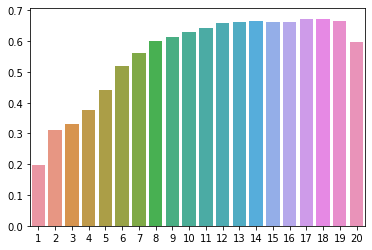

11


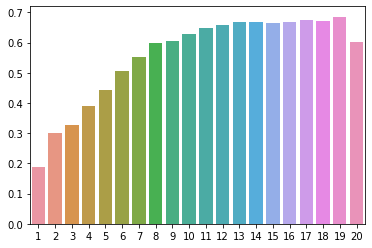

12


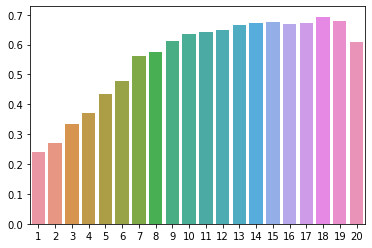

13


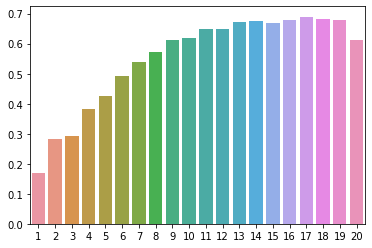

14


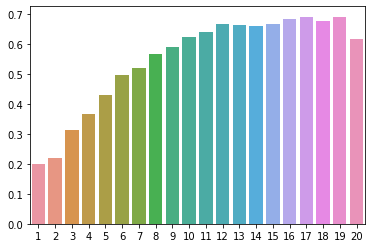

15


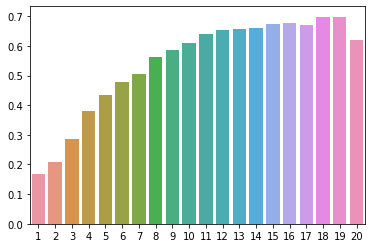

16


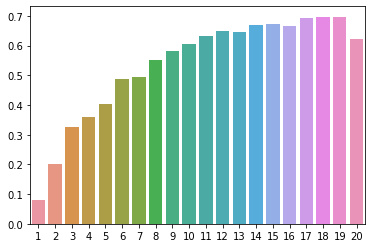

17


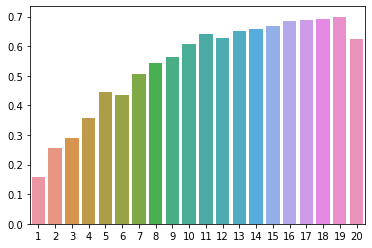

18


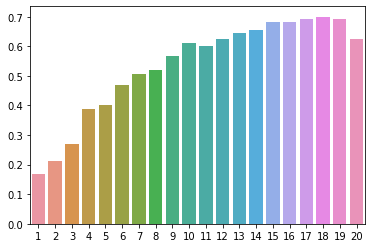

19


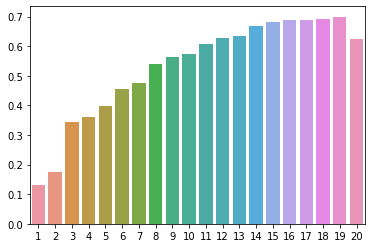

In [75]:
k_precs= [] 
for k in range(len(precisions)):
    TP_ = TP[k][~np.isnan(precisions[k])]
    FP_ = FP[k][~np.isnan(precisions[k])]
    precisions_ = precisions[k][~np.isnan(precisions[k])]
    xs = get_xs(TP_, FP_, precisions_)
    precs= [*map(lambda x: sum(x)/len(x), xs)]
    sns.barplot(y=precs, x=np.arange(1,21))
    print(k)
    plt.show()
    k_precs.append(precs)

In [139]:
Z = np.array(k_precs)

In [140]:
X, Y = np.meshgrid(np.arange(1,21), np.arange(30))

<ipython-input-147-bf9bb5b99011>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(plt.axes(projection='3d'))


Text(0.5, 0, 'k')

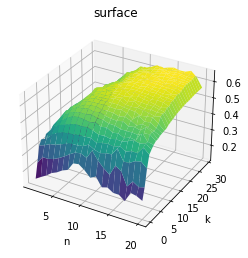

In [147]:
fig = plt.figure()
ax = plt.axes(plt.axes(projection='3d'))
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');
ax.set_xlabel('n')
ax.set_ylabel('k')
#ax.set_zlabel('z');

In [43]:
TP, FP, FN = scores_knn_detail["gpt2_ns_auto"]["dets"]
precisions = scores_knn_detail["gpt2_ns_auto"]["precs"]

NameError: name 'scores_knn_detail' is not defined

# DOWN TO 0.5

In [89]:
_, scores_gpt_detail = model_selection(P_FOLDER, "hugg_test", kw="gpt", up_to_k=20, \
                                      l=4, j=6, to_rel_inten=.5, l_rel=None, return_details=True)

gpt2_ns_auto
Possible k up to 30, predict up to 20 peaks
Selected up to k=20, l=4, j=6
Selected up to k=20, l=None, to_rel_inten=0.5
27
21
22
22
26
22
22
23
22
21
21
22
26
21
23
22
21
28
22
22
23
31
22
21
25
23
22
21
24
23
22
21
31
22
22
21
21
23
22
26
22
23
21
21
21
34
26
21
21
24
21
21
22
23
27
21
24
25
23
23
21
23
21
23
22
21
25
23
21
23
24
24
30
22
21
25
21
25
26
31
24
22
21
30
23
26
22
22
27
22
21
27
21
21
22
41
21
24
21
12164
[14527 18346 20337 21393 21955 22225 22321 22406 22453 22421 22429 22381
 22340 22303 22224 22141 22081 21974 21874 21744]


In [90]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
TP, FP, FN = scores_gpt_detail["gpt2_ns_auto"]["dets"]
precisions = scores_gpt_detail["gpt2_ns_auto"]["precs"]

TP = TP[~np.isnan(precisions)]
FP = FP[~np.isnan(precisions)]
FN = FN[~np.isnan(precisions)]
precisions = precisions[~np.isnan(precisions)]

In [92]:
def get_xs(TP, FP, precisions):
    xs = [list() for _ in range(20)]
    for i, p in enumerate(precisions):
        xs[int(TP[i]+FP[i])-1].append(p)
    for x in xs:
        x.pop(0)
    return xs
xs = get_xs(TP, FP, precisions)

Text(0.5, 1.0, 'down_to_.5')

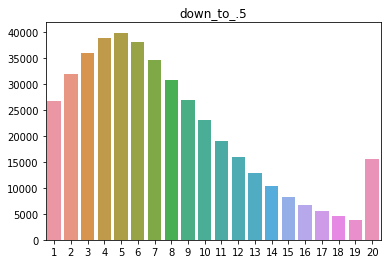

In [97]:
sns.barplot(y=[*map(len, xs)], x=np.arange(1,21))
plt.title("down_to_.5")

<AxesSubplot:>

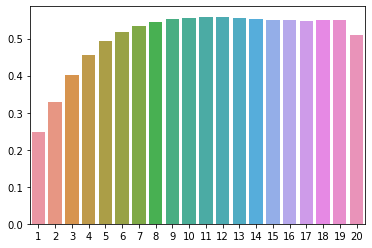

In [94]:
sns.barplot(y=[*map(lambda x: sum(x)/len(x), xs)], x=np.arange(1,21))

In [95]:
#per k 

0.5
k=0, over 19 peaks were in the region of interest in 3 out of 14507 cases 


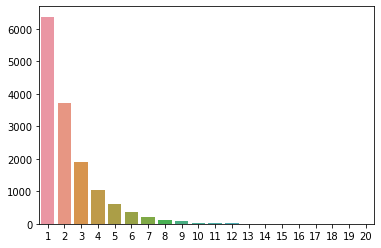

k=1, over 19 peaks were in the region of interest in 11 out of 18326 cases 


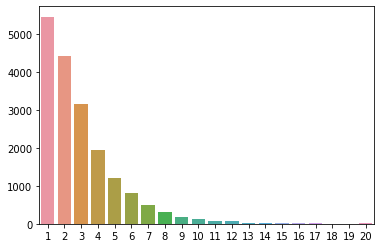

k=2, over 19 peaks were in the region of interest in 17 out of 20317 cases 


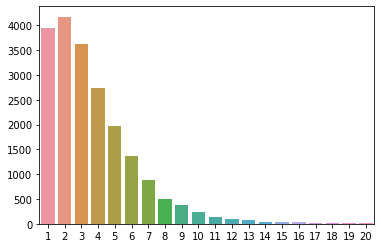

k=3, over 19 peaks were in the region of interest in 36 out of 21373 cases 


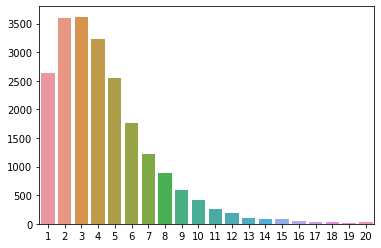

k=4, over 19 peaks were in the region of interest in 79 out of 21935 cases 


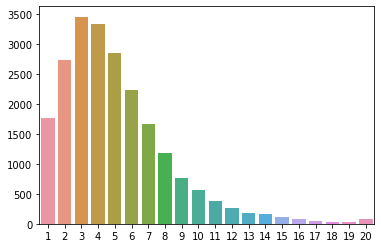

k=5, over 19 peaks were in the region of interest in 122 out of 22205 cases 


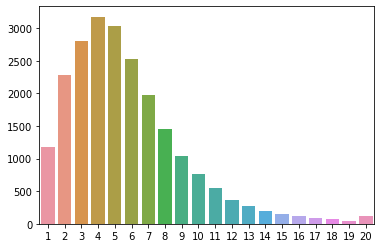

k=6, over 19 peaks were in the region of interest in 189 out of 22301 cases 


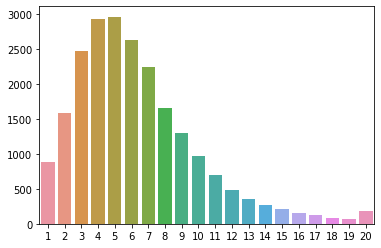

k=7, over 19 peaks were in the region of interest in 279 out of 22386 cases 


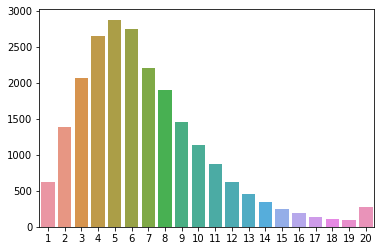

k=8, over 19 peaks were in the region of interest in 362 out of 22433 cases 


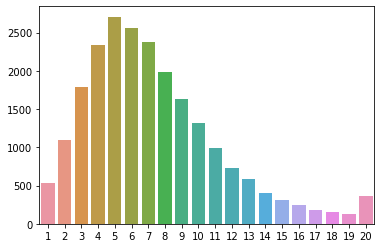

k=9, over 19 peaks were in the region of interest in 503 out of 22401 cases 


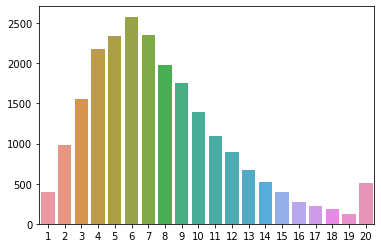

k=10, over 19 peaks were in the region of interest in 607 out of 22409 cases 


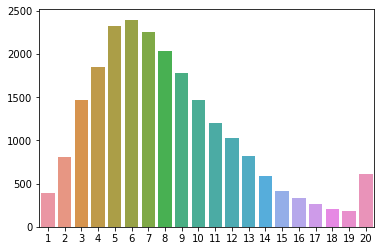

k=11, over 19 peaks were in the region of interest in 768 out of 22361 cases 


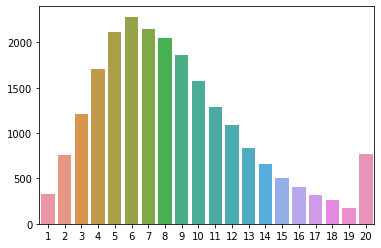

k=12, over 19 peaks were in the region of interest in 950 out of 22320 cases 


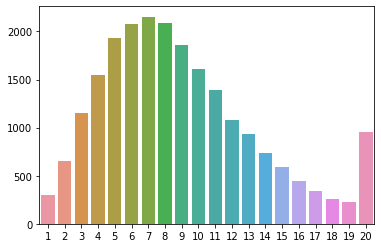

k=13, over 19 peaks were in the region of interest in 1088 out of 22283 cases 


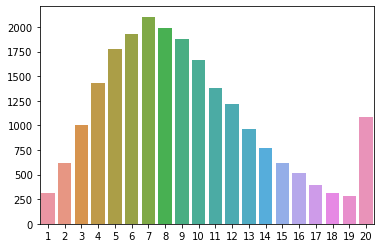

k=14, over 19 peaks were in the region of interest in 1261 out of 22204 cases 


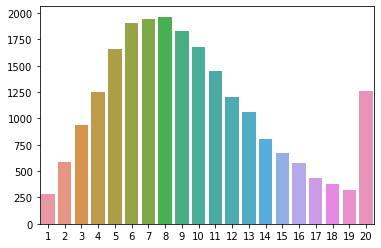

k=15, over 19 peaks were in the region of interest in 1456 out of 22121 cases 


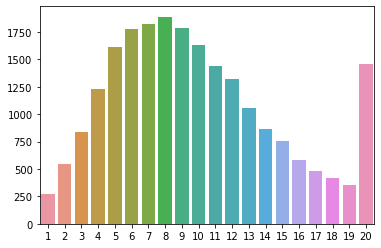

k=16, over 19 peaks were in the region of interest in 1654 out of 22061 cases 


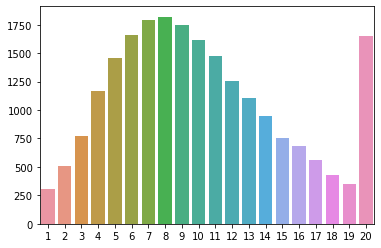

k=17, over 19 peaks were in the region of interest in 1832 out of 21954 cases 


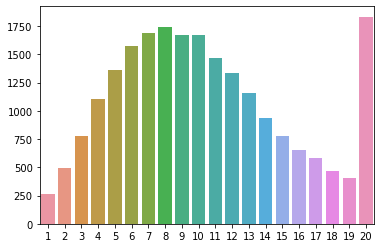

k=18, over 19 peaks were in the region of interest in 2034 out of 21854 cases 


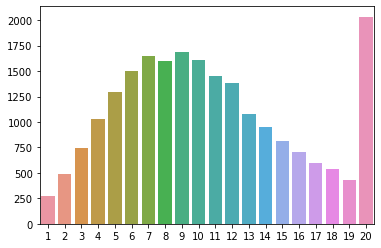

k=19, over 19 peaks were in the region of interest in 2227 out of 21724 cases 


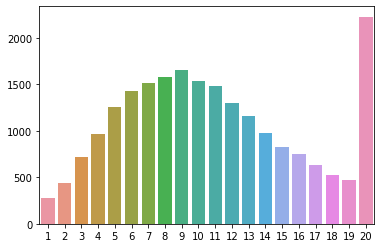

In [98]:
TP, FP, FN = scores_gpt_detail["gpt2_ns_auto"]["dets"]
precisions = scores_gpt_detail["gpt2_ns_auto"]["precs"]
k_lens= [] 
print(0.5)
for k in range(len(precisions)):
    TP_ = TP[k][~np.isnan(precisions[k])]
    FP_ = FP[k][~np.isnan(precisions[k])]
    precisions_ = precisions[k][~np.isnan(precisions[k])]
    xs = get_xs(TP_, FP_, precisions_)
    lens= [*map(len, xs)]
    sns.barplot(y=lens, x=np.arange(1,21))
    print(f"k={k}, over 19 peaks were in the region of interest in {lens[-1]} out of {sum(lens)} cases ")
    plt.show()
    k_lens.append(lens)

In [99]:
Z = np.array(k_lens)

In [101]:
X, Y = np.meshgrid(np.arange(1,21), np.arange(20))

Text(0, 0.5, 'y')

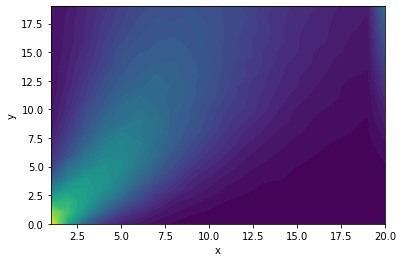

In [102]:
fig = plt.figure()
ax = plt.axes()#plt.axes(projection='3d')
ax.contourf(X, Y, Z, 50) #cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.set_zlabel('z');

0


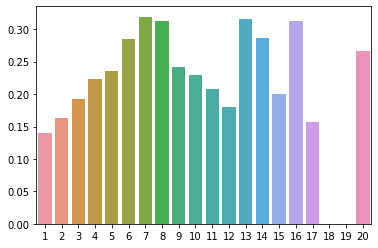

1


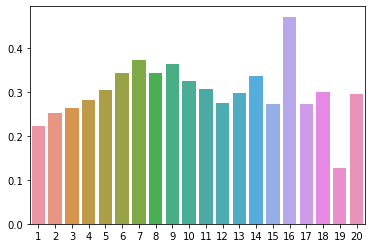

2


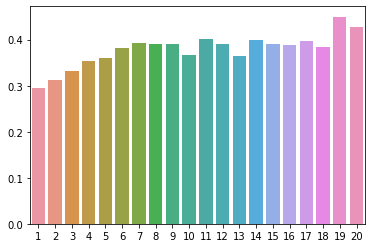

3


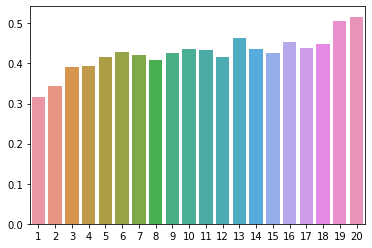

4


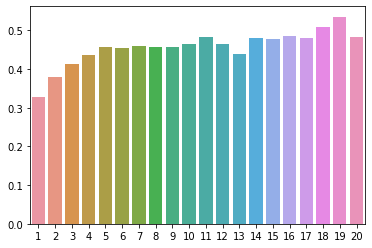

5


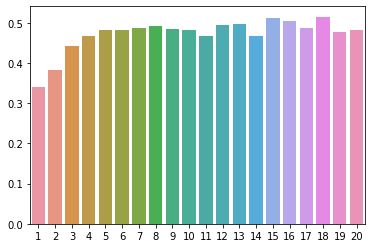

6


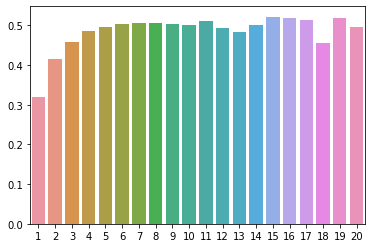

7


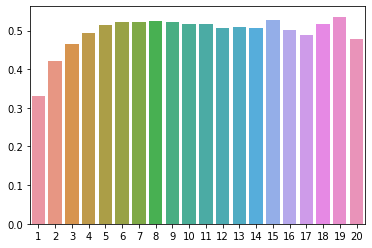

8


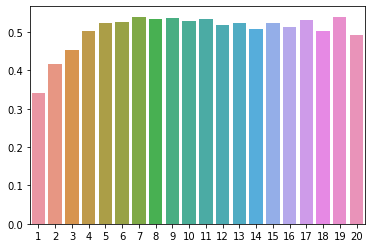

9


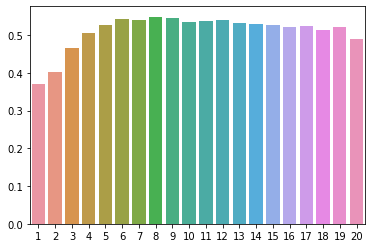

10


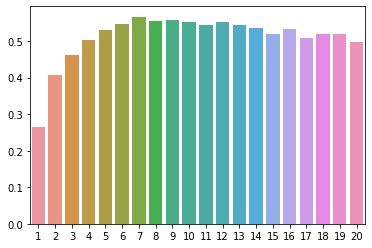

11


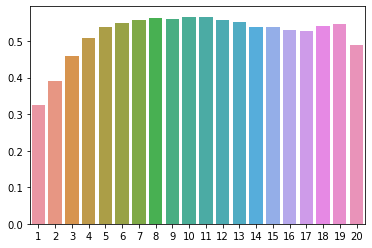

12


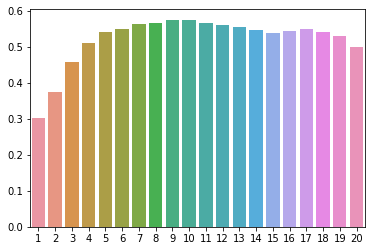

13


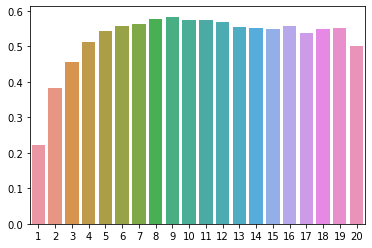

14


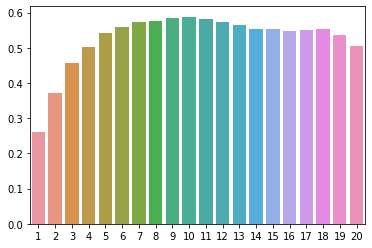

15


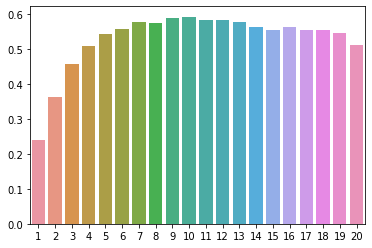

16


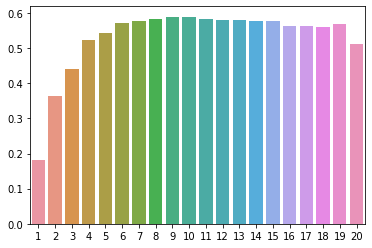

17


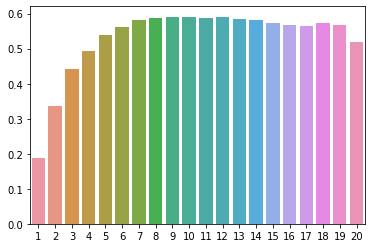

18


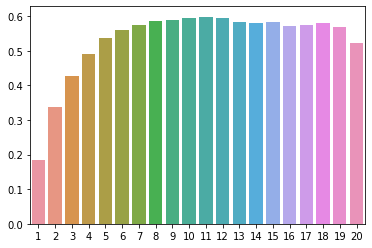

19


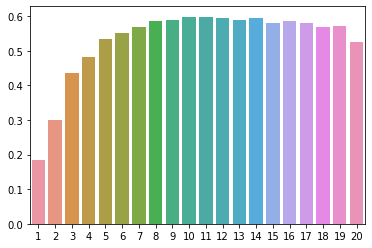

In [111]:
TP, FP, FN = scores_gpt_detail["gpt2_ns_auto"]["dets"]
precisions = scores_gpt_detail["gpt2_ns_auto"]["precs"]
k_precs= [] 
for k in range(len(precisions)):
    TP_ = TP[k][~np.isnan(precisions[k])]
    FP_ = FP[k][~np.isnan(precisions[k])]
    precisions_ = precisions[k][~np.isnan(precisions[k])]
    xs = get_xs(TP_, FP_, precisions_)
    precs= [*map(lambda x: sum(x)/len(x) if len(x)!=0 else 0, xs)]
    sns.barplot(y=precs, x=np.arange(1,21))
    print(k)
    plt.show()
    k_precs.append(precs)

In [ ]:
Z = np.array(k_precs)

In [ ]:
X, Y = np.meshgrid(np.arange(1,21), np.arange(30))

In [ ]:
fig = plt.figure()
ax = plt.axes(plt.axes(projection='3d'))
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');
ax.set_xlabel('n')
ax.set_ylabel('k')
#ax.set_zlabel('z');

In [ ]:
TP, FP, FN = scores_knn_detail["gpt2_ns_auto"]["dets"]
precisions = scores_knn_detail["gpt2_ns_auto"]["precs"]